# Convolutional Neural Networks: CIFAR10

#### <b>Problem Statement</b>

We will be using the TensorFlow libraries to build a CNN model that performs classification over the CIFAR10 dataset. The objective is to train the architecture to classify the images with maximum accuracy.

<br>

#### <b>Tasks</b>

1. Understanding image structure
2. Image classification using simple ANN architecture
3. Implementing convolution over a sample image
4. Image classification using simple CNN architecture
5. Experimentation

<br>

#### <b>About the Dataset</b>
CIFAR-10 dataset is an image repository that consists of 60,000 RGB images each of size (32, 32, 3). There are 10 different classes with 6,000 images in each class:
* aeroplane
* automobile
* bird
* deer
* dog
* frog
* horse
* ship
* truck

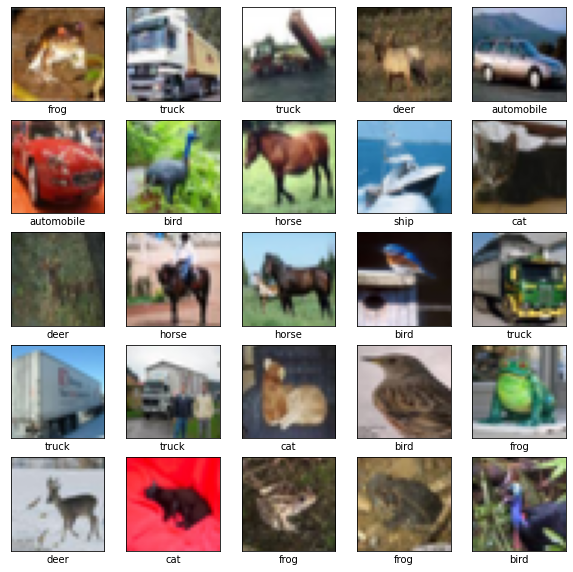



#### <b>Architecture</b>
We will be working with the simple CNN architecture. Here, we will be working with reduced number of layers in comparison to the VGGNet architecture as the size of the images is 32\*32 instead of 224\*224.


## Demonstration

#### <b>Import TensorFlow</b>

In [1]:
# importing the required libraries
import tensorflow as tf

# importing different elements (datasets, layers, etc.) to build the CNN model
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D , Dropout

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

%load_ext autotime

time: 134 µs (started: 2022-10-01 18:16:04 +05:30)


#### <b>Loading the CIFAR10 dataset</b>


The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [2]:
# Loading the dataset - Train, test
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

time: 297 ms (started: 2022-10-01 18:16:04 +05:30)


In [3]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

time: 328 ms (started: 2022-10-01 18:16:05 +05:30)


In [4]:
# Defining output classes - 10 labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

time: 232 µs (started: 2022-10-01 18:16:05 +05:30)


#### **Verify the data**

To verify that the dataset looks correct, let's check the size of the datasets. Also, we will plot the first 25 images from the training set and display the class name associated with them.


In [5]:
# Size of training data
print(f'''Training set size - {train_images.shape}
-- There are 50,000 images for training our model.
-- Each image is 32x32 pixels and has 3 color channels.
''')

print(f'''Training labels size - {train_labels.shape}
-- There are 50,000 corresponding training labels (one for each image).
''')

Training set size - (50000, 32, 32, 3)
-- There are 50,000 images for training our model.
-- Each image is 32x32 pixels and has 3 color channels.

Training labels size - (50000, 1)
-- There are 50,000 corresponding training labels (one for each image).

time: 531 µs (started: 2022-10-01 18:16:05 +05:30)


In [6]:
# Similar activity for test data
print(f'''Testing set size - {test_images.shape}
-- There are 10,000 images for testing our model.
-- Each image is 32x32 pixels and has 3 color channels.
''')

print(f'''Testing labels size - {test_labels.shape}
-- There are 10,000 corresponding testing labels.
''')

Testing set size - (10000, 32, 32, 3)
-- There are 10,000 images for testing our model.
-- Each image is 32x32 pixels and has 3 color channels.

Testing labels size - (10000, 1)
-- There are 10,000 corresponding testing labels.

time: 320 µs (started: 2022-10-01 18:16:05 +05:30)


#### **Exploring the images**

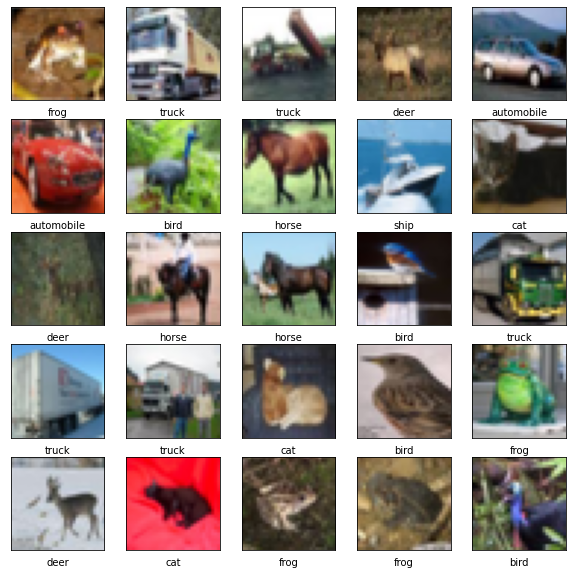

time: 437 ms (started: 2022-10-01 18:16:05 +05:30)


In [7]:
# Plotting first 25 images with their labels

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    
    # The CIFAR labels are stored as arrays.
    # So, you need an extra index.
    
    plt.xlabel(class_names[train_labels[i][0]])

# Plotting the images
plt.show()

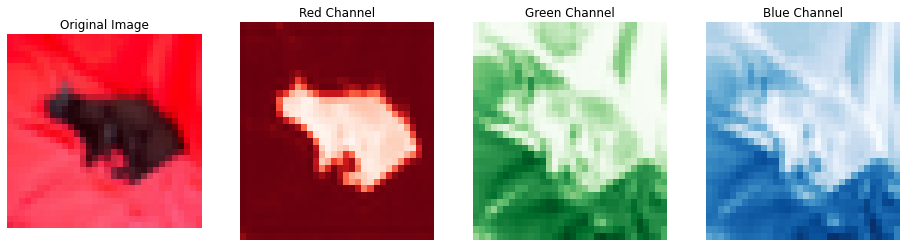

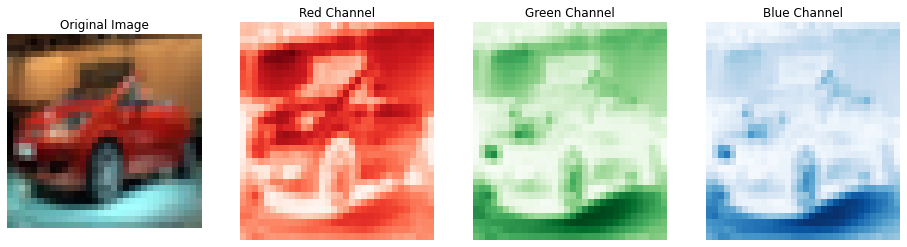

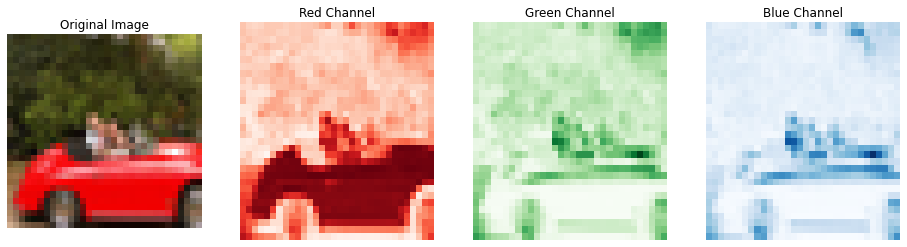

time: 415 ms (started: 2022-10-01 18:16:06 +05:30)


In [8]:
# Separating the channels for sample images: 21, 45, 99

images_indices=[21,45,99]
for i in range(len(images_indices)):
  image_array = train_images[images_indices[i]]
  
  # print("Shape of an image - ",image_array.shape)
  
  plt.figure(figsize=(16,4))

  # Original image
  plt.subplot(1,4,1)
  plt.imshow(image_array, cmap=plt.cm.binary)
  plt.axis('off')
  plt.title("Original Image")

  # Red channel
  plt.subplot(1,4,2)
  sns.heatmap(image_array[:,:,0],cmap='Reds',cbar=False)
  plt.axis('off')
  plt.title("Red Channel")

  # Green channel
  plt.subplot(1,4,3)
  sns.heatmap(image_array[:,:,1],cmap='Greens',cbar=False)
  plt.axis('off')
  plt.title("Green Channel")

  # Blue channel
  plt.subplot(1,4,4)
  sns.heatmap(image_array[:,:,2],cmap='Blues',cbar=False)
  plt.axis('off')
  plt.title("Blue Channel")
  plt.show()

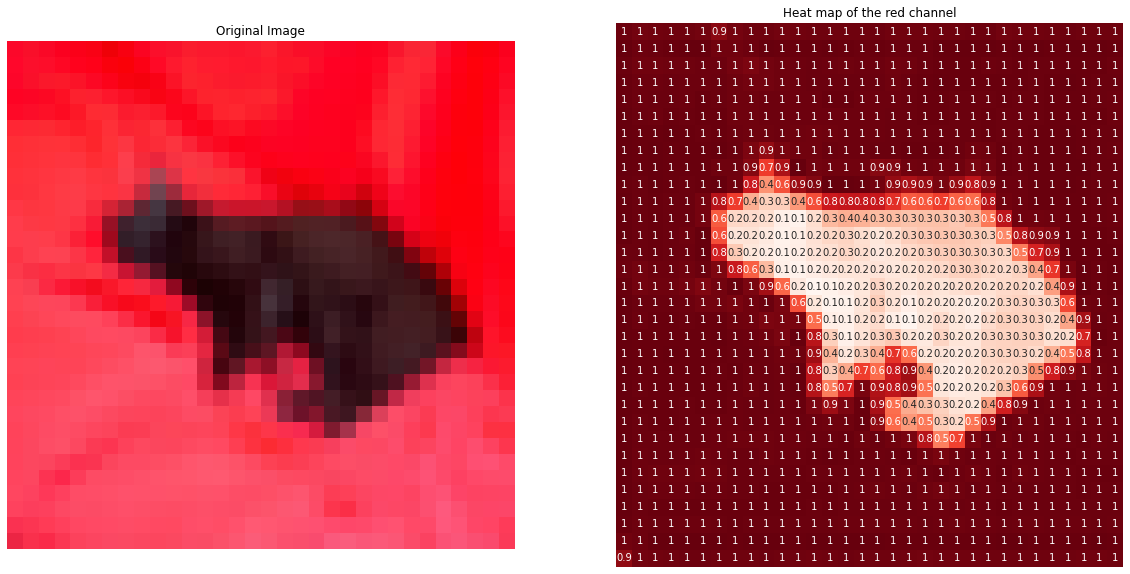

time: 979 ms (started: 2022-10-01 18:16:06 +05:30)


In [9]:
# Exploring the normalised values for the red channel

# Original image
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(train_images[21], cmap=plt.cm.binary)
plt.title("Original Image")
plt.axis('off')

# Heat map that highlights normalised the pixel values
plt.subplot(1,2,2)
sns.heatmap(train_images[21][:,:,0],annot=True, fmt='.1g', cmap='Reds', cbar=False)
plt.axis('off')
plt.title("Heat map of the red channel")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


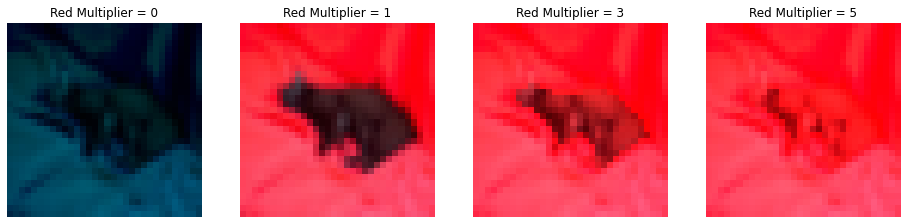

time: 77.1 ms (started: 2022-10-01 18:16:07 +05:30)


In [10]:
# Changing the intensity of red channel in the image 21

plt.figure(figsize=(16,4)) 

# 0: Red channel is eliminated
# 1: Red channel is kept same
# 3, 5: Red channel is intensified

red_enhancement_factors=[0,1,3,5]

# Plotting the images
for i in range(len(red_enhancement_factors)):
  image_array=train_images[21].copy()
  plt.subplot(1,4,i+1)
  
  # 
  image_array[:,:,0]=image_array[:,:,0]*red_enhancement_factors[i]
  plt.imshow(image_array, cmap=plt.cm.binary)
  plt.axis('off')
  plt.title("Red Multiplier = {}".format(red_enhancement_factors[i]))
plt.show()

#### **Vanilla ANNs**

First, we will try to use the simple ANN framework to build the model for classification

### Fully connected ANNs

In [11]:
# Defining the model
model = models.Sequential()

# Defining the layers
model.add(layers.Flatten())
model.add(layers.Dense(2**10, activation='relu'))
model.add(layers.Dense(10))

Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

time: 24.1 ms (started: 2022-10-01 18:16:07 +05:30)


2022-10-01 18:16:07.821234: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-01 18:16:07.821652: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
# Defining the model parameters
# optimizer: adam (SGD)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fitting the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


2022-10-01 18:16:08.851073: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


   5/1563 [..............................] - ETA: 24s - loss: 5.0754 - accuracy: 0.1750 

2022-10-01 18:16:09.090409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.8800 - accuracy: 0.3360

2022-10-01 18:16:21.179659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 14s 8ms/step - loss: 1.8800 - accuracy: 0.3360 - val_loss: 1.7122 - val_accuracy: 0.3926
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6802 - accuracy: 0.4013 - val_loss: 1.7204 - val_accuracy: 0.3865
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6125 - accuracy: 0.4248 - val_loss: 1.5946 - val_accuracy: 0.4195
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5656 - accuracy: 0.4429 - val_loss: 1.5387 - val_accuracy: 0.4452
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5359 - accuracy: 0.4537 - val_loss: 1.5585 - val_accuracy: 0.4519
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5095 - accuracy: 0.4659 - val_loss: 1.5260 - val_accuracy: 0.4638
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4893 - accuracy: 0.4700 - val_loss: 1.5154 - val_accuracy: 0.4

In [13]:
# Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 3,157,002
Trainable params: 3,157,002
Non-trainable params: 0
_________________________________________________________________
time: 7.21 ms (started: 2022-10-01 18:18:15 +05:30)


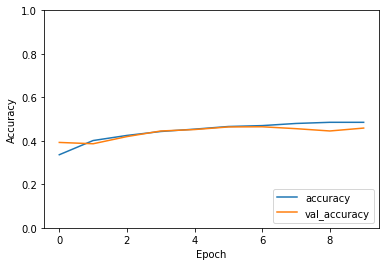

time: 50.4 ms (started: 2022-10-01 18:18:15 +05:30)


In [14]:
# Plotting accuracy over train and test data
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

As you can see, the accuracy doesn't increase much with each epoch and the value is also very low.

In [15]:
# Experimenting with the dense layers

# Defining the model
model = models.Sequential()

# Defining the layers
model.add(layers.Flatten())

# Varying the number of dense layers
for i in range(5):
  model.add(layers.Dense(2**9/(i+1), activation='relu'))
model.add(layers.Dense(10))

# Defining the model parameters
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fitting the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Results
model.summary()

Epoch 1/10
   7/1563 [..............................] - ETA: 14s - loss: 2.4388 - accuracy: 0.1027  

2022-10-01 18:18:16.140346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.8875 - accuracy: 0.3089

2022-10-01 18:18:30.236640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 16s 10ms/step - loss: 1.8875 - accuracy: 0.3089 - val_loss: 1.7657 - val_accuracy: 0.3547
Epoch 2/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.7062 - accuracy: 0.3849 - val_loss: 1.6894 - val_accuracy: 0.3907
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.6258 - accuracy: 0.4148 - val_loss: 1.6124 - val_accuracy: 0.4324
Epoch 4/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.5729 - accuracy: 0.4361 - val_loss: 1.5379 - val_accuracy: 0.4460
Epoch 5/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.5276 - accuracy: 0.4512 - val_loss: 1.5378 - val_accuracy: 0.4517
Epoch 6/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4957 - accuracy: 0.4648 - val_loss: 1.5033 - val_accuracy: 0.4651
Epoch 7/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4682 - accuracy: 0.4736 - val_loss: 1.4837 - val_accuracy:

Even after experimenting with the dense layers, the accuraccy value didn't increase much.

In [16]:
# Defining the model
model = models.Sequential()

# Defining the layers
model.add(layers.Flatten())
for i in range(5):
  model.add(layers.Dense(2**9/(i+1), activation='relu'))
model.add(layers.Dense(10))

# Defining the model parameters
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Increasing the epoch value
history = model.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels))

# Results
model.summary()

Epoch 1/50
   7/1563 [..............................] - ETA: 13s - loss: 2.4381 - accuracy: 0.0714 

2022-10-01 18:20:44.581798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.8836 - accuracy: 0.3094

2022-10-01 18:20:58.060503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 15s 9ms/step - loss: 1.8836 - accuracy: 0.3094 - val_loss: 1.8205 - val_accuracy: 0.3185
Epoch 2/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.7061 - accuracy: 0.3852 - val_loss: 1.6614 - val_accuracy: 0.4042
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.6282 - accuracy: 0.4136 - val_loss: 1.6077 - val_accuracy: 0.4218
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5754 - accuracy: 0.4338 - val_loss: 1.5497 - val_accuracy: 0.4439
Epoch 5/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5325 - accuracy: 0.4504 - val_loss: 1.5418 - val_accuracy: 0.4462
Epoch 6/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4971 - accuracy: 0.4640 - val_loss: 1.4825 - val_accuracy: 0.4698
Epoch 7/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4642 - accuracy: 0.4760 - val_loss: 1.5712 - val_accuracy:

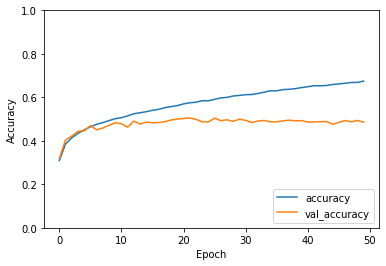

time: 54.5 ms (started: 2022-10-01 18:32:45 +05:30)


In [17]:
# Plotting accuracy over train and test data
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

Adding the number of epochs resulted in great improvement in the train accuracy. However, there is no change in the test accuracy. This suggests that the model has started to overfit over the data.

<br>

### **Convolutional Neural Networks**

#### Creating the CNN architecture

Now, we define the CNN architecture using a stack of the convolution and the max pooling layers.

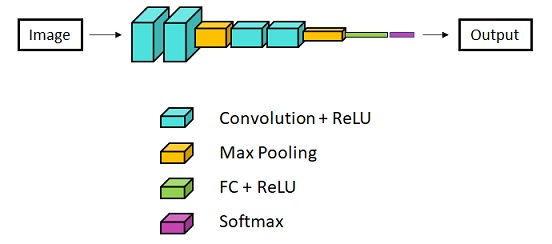

As input, a CNN takes the tensors of shape (image_height, image_width, color_channels). Here, we will now configure our CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images.

In [18]:
# Defining the model
model = models.Sequential()

# Adding layers to the model

# 1st Conv Block - 2 convolution layers and 1 Pooling layer

# Convolution and Normalisation
# General Syntax
# tf.keras.layers.Conv2D(
#    filters, kernel_size, strides=(1, 1), padding='valid', activation=None)

# Input layer with 32 filters of size 3*3
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu'))

# Pooling layer
# General Syntax
# tf.keras.layers.MaxPool2D(
#    pool_size=(2, 2), strides=None, padding='valid')

model.add(layers.MaxPooling2D((2, 2)))

# 2nd Conv Block - 2 convolution layers and 1 Pooling layer
model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

time: 61 ms (started: 2022-10-01 18:32:45 +05:30)


Let's display the architecture of our model so far.

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). 


* The width and height dimensions tend to shrink as you go deeper in the network due to pooling. 
* The number of output channels for each Conv2D layer represent the feature maps. 

#### Adding Dense layers
To complete our model, we will require the dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor (height, width, channels). 

First, you will have flatten the 3D output to 1D. This can be done by adding sense layers on top. 

Finally, CIFAR10 has 10 output classes, so the softmax function is applied using the final dense layer having 10 outputs.

In [20]:
# Fully connected layer
model.add(Flatten())
model.add(Dense(512, activation ='relu'))

# Output Layer
model.add(Dense(10, activation='softmax'))

time: 35.7 ms (started: 2022-10-01 18:32:45 +05:30)


Here's the complete architecture of our model.

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

#### Compile and train the model

In [22]:
# Defining the model parameters
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fitting the model over train and test data
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


2022-10-01 18:32:46.694204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.3349 - accuracy: 0.5224

2022-10-01 18:33:08.519132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 24s 15ms/step - loss: 1.3349 - accuracy: 0.5224 - val_loss: 1.0104 - val_accuracy: 0.6580
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8503 - accuracy: 0.7015 - val_loss: 0.8109 - val_accuracy: 0.7172
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6425 - accuracy: 0.7745 - val_loss: 0.8070 - val_accuracy: 0.7219
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.4830 - accuracy: 0.8313 - val_loss: 0.7720 - val_accuracy: 0.7507
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.3477 - accuracy: 0.8767 - val_loss: 0.8236 - val_accuracy: 0.7571
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.2346 - accuracy: 0.9188 - val_loss: 1.1356 - val_accuracy: 0.7123
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.1627 - accuracy: 0.9434 - val_loss: 1.0767 - val_accura

#### Evaluate the model

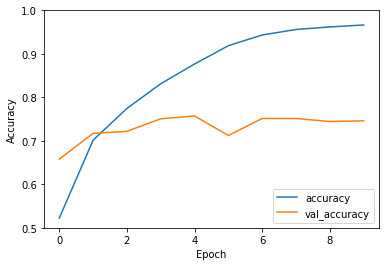

time: 51.4 ms (started: 2022-10-01 18:36:33 +05:30)


In [23]:
# Plotting accuracy over train and test data against the Epoch value
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [24]:
# Evaluating the test accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 2s - loss: 1.4812 - accuracy: 0.7460 - 2s/epoch - 7ms/step
0.7460000514984131
time: 2.32 s (started: 2022-10-01 18:36:33 +05:30)


Our simple CNN performs much better than the ANN as it has achieved a test accuracy of over 74%. Another observation that you should make from the graph is that the model tends to overfit as the number of epochs increase.

### **Experiments with the CNN model**

#### Increasing Number of epochs

Let's try to understand if increasing the iterations for learning the parameters of the model increases the accuracy over test dataset or not.

In [25]:
model = models.Sequential()

# Convolution and Pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flattening and Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

# Adding the output layer
model.add(layers.Dense(10))

# Model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

Epoch 1/50


2022-10-01 18:36:37.810678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.4095 - accuracy: 0.4849

2022-10-01 18:36:58.609848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 23s 14ms/step - loss: 1.4095 - accuracy: 0.4849 - val_loss: 1.1059 - val_accuracy: 0.6091
Epoch 2/50
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9515 - accuracy: 0.6653 - val_loss: 1.0054 - val_accuracy: 0.6500
Epoch 3/50
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7778 - accuracy: 0.7258 - val_loss: 0.8307 - val_accuracy: 0.7034
Epoch 4/50
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6569 - accuracy: 0.7695 - val_loss: 0.8012 - val_accuracy: 0.7251
Epoch 5/50
1563/1563 [==============================] - 22s 14ms/step - loss: 0.5596 - accuracy: 0.8026 - val_loss: 0.7628 - val_accuracy: 0.7376
Epoch 6/50
1563/1563 [==============================] - 21s 13ms/step - loss: 0.4692 - accuracy: 0.8337 - val_loss: 0.7768 - val_accuracy: 0.7547
Epoch 7/50
1563/1563 [==============================] - 21s 13ms/step - loss: 0.3874 - accuracy: 0.8624 - val_loss: 0.8298 - val_accura

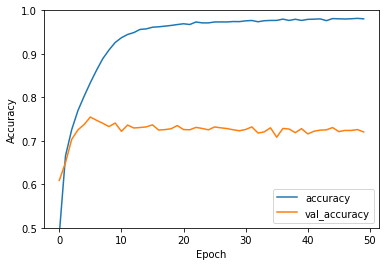

time: 17min 22s (started: 2022-10-01 18:36:36 +05:30)


In [26]:
# Model parameters
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Model training with 50 epochs (Previously it was 10)
history = model.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels))

# Plotting the accuracy values
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [27]:
# Evaluating the test accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 2s - loss: 3.0162 - accuracy: 0.7204 - 2s/epoch - 5ms/step
0.7204000353813171
time: 1.77 s (started: 2022-10-01 18:53:58 +05:30)


As you can see, increasing the epoch value doesn't result in any improvement over the test data.

#### Adding Dropout

Prevents the overfitting in the model by randomly dropping contribution of some neurons towards the next layer.

In [28]:
model = models.Sequential()

# Convolution and Pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Flattening and Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

# Higher dropout value for dense layers
model.add(layers.Dropout(0.5))

# Adding the output layer
model.add(layers.Dense(10))

# Model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 64)        36928     
                                                      

In [29]:
# Defining the model parameters
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fitting the model over train and test data
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


2022-10-01 18:54:02.305798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.5473 - accuracy: 0.4314

2022-10-01 18:54:23.546754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 23s 15ms/step - loss: 1.5473 - accuracy: 0.4314 - val_loss: 1.1989 - val_accuracy: 0.5612
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1270 - accuracy: 0.5968 - val_loss: 0.9693 - val_accuracy: 0.6595
Epoch 3/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.9610 - accuracy: 0.6626 - val_loss: 0.8887 - val_accuracy: 0.6928
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8672 - accuracy: 0.6944 - val_loss: 0.8769 - val_accuracy: 0.6987
Epoch 5/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.8069 - accuracy: 0.7138 - val_loss: 0.7732 - val_accuracy: 0.7323
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7566 - accuracy: 0.7328 - val_loss: 0.7451 - val_accuracy: 0.7423
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7128 - accuracy: 0.7471 - val_loss: 0.7618 - val_accura

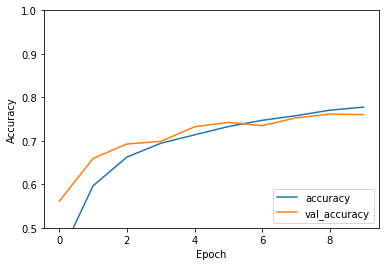

time: 56.8 ms (started: 2022-10-01 18:57:45 +05:30)


In [30]:
# Plotting accuracy over train and test data against the Epoch value
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [31]:
# Evaluating the test accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 2s - loss: 0.7045 - accuracy: 0.7603 - 2s/epoch - 6ms/step
0.7603000402450562
time: 2.72 s (started: 2022-10-01 18:57:46 +05:30)


As it can be seen, dropouts help in solving the problem of overfitting. Even, the accuracy over the test data has increased.

#### Adding Batch Normalization (without dropouts)



Batch 

In [32]:
model = models.Sequential()

# Convolution and Pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Flattening and Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

# Adding the output layer
model.add(layers.Dense(10))

# Model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                      

In [33]:
# Defining the model parameters
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fitting the model over train and test data
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


2022-10-01 18:57:49.834875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.1965 - accuracy: 0.5818

2022-10-01 18:58:13.234539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 26s 15ms/step - loss: 1.1965 - accuracy: 0.5818 - val_loss: 1.0351 - val_accuracy: 0.6271
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7869 - accuracy: 0.7249 - val_loss: 0.8315 - val_accuracy: 0.7213
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6168 - accuracy: 0.7845 - val_loss: 0.8822 - val_accuracy: 0.7104
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.4859 - accuracy: 0.8304 - val_loss: 0.9028 - val_accuracy: 0.7307
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.3627 - accuracy: 0.8734 - val_loss: 0.9498 - val_accuracy: 0.7302
Epoch 6/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.2684 - accuracy: 0.9062 - val_loss: 0.8980 - val_accuracy: 0.7513
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.1966 - accuracy: 0.9308 - val_loss: 1.0576 - val_accura

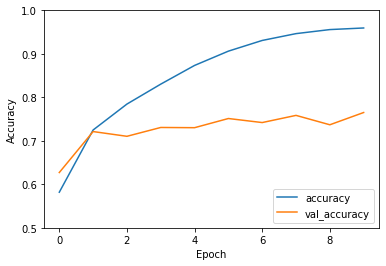

time: 44.2 ms (started: 2022-10-01 19:01:36 +05:30)


In [34]:
# Plotting accuracy over train and test data against the Epoch value
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [35]:
# Evaluating the test accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 2s - loss: 1.1303 - accuracy: 0.7651 - 2s/epoch - 6ms/step
0.7651000618934631
time: 1.97 s (started: 2022-10-01 19:01:36 +05:30)


Batch normalisation also results in improvement of the model. The accuracy has increased from 70% to 75% over the test data. However, the problem of overfitting has returned as there are dense layers in the architecture.

#### Increasing Convolutional Units

In [36]:
# Defining the model
model = models.Sequential()

# Adding layers to the model

# 1st Conv Block - 2 convolution layers and 1 Pooling layer
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Conv Block - 2 convolution layers and 1 Pooling layer
model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Conv Block - 2 convolution layers and 1 Pooling layer
model.add(layers.Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flattening and Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

# Adding the output layer
model.add(layers.Dense(10))

# Model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [37]:
# Defining the model parameters
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fitting the model over train and test data
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5


2022-10-01 19:01:39.344792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.4171 - accuracy: 0.4794

2022-10-01 19:02:02.393055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 26s 16ms/step - loss: 1.4171 - accuracy: 0.4794 - val_loss: 1.0784 - val_accuracy: 0.6253
Epoch 2/5
1563/1563 [==============================] - 24s 16ms/step - loss: 0.9205 - accuracy: 0.6772 - val_loss: 0.8748 - val_accuracy: 0.6992
Epoch 3/5
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7229 - accuracy: 0.7454 - val_loss: 0.7982 - val_accuracy: 0.7229
Epoch 4/5
1563/1563 [==============================] - 24s 15ms/step - loss: 0.5958 - accuracy: 0.7898 - val_loss: 0.7294 - val_accuracy: 0.7585
Epoch 5/5
1563/1563 [==============================] - 24s 15ms/step - loss: 0.4926 - accuracy: 0.8270 - val_loss: 0.6982 - val_accuracy: 0.7651
time: 2min 3s (started: 2022-10-01 19:01:38 +05:30)


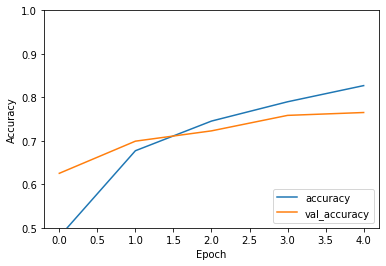

time: 49.1 ms (started: 2022-10-01 19:03:41 +05:30)


In [38]:
# Plotting accuracy over train and test data against the Epoch value
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [39]:
# Evaluating the test accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 2s - loss: 0.6982 - accuracy: 0.7651 - 2s/epoch - 7ms/step
0.7651000618934631
time: 2.23 s (started: 2022-10-01 19:03:41 +05:30)


#### Increasing the feature maps

In [40]:
model = models.Sequential()

# Convolution and Pooling layers
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Flattening and Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))

# Adding the output layer
model.add(layers.Dense(10))

time: 7.66 ms (started: 2022-10-01 19:03:44 +05:30)


In [41]:
# Defining the model parameters
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fitting the model over train and test data
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


# Model summary
model.summary()

Epoch 1/10


2022-10-01 19:03:45.066951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.5167 - accuracy: 0.4759

2022-10-01 19:04:09.894139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 28s 17ms/step - loss: 1.5167 - accuracy: 0.4759 - val_loss: 1.1166 - val_accuracy: 0.6073
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0463 - accuracy: 0.6341 - val_loss: 1.3203 - val_accuracy: 0.5641
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8851 - accuracy: 0.6949 - val_loss: 0.8819 - val_accuracy: 0.6865
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7902 - accuracy: 0.7279 - val_loss: 0.7546 - val_accuracy: 0.7406
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7110 - accuracy: 0.7579 - val_loss: 0.7676 - val_accuracy: 0.7412
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6475 - accuracy: 0.7781 - val_loss: 1.0294 - val_accuracy: 0.6671
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.5961 - accuracy: 0.7960 - val_loss: 0.7112 - val_accura

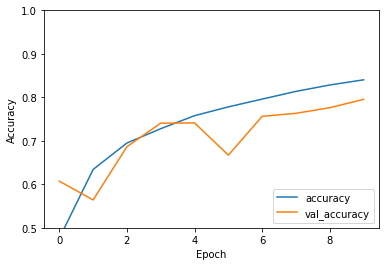

time: 49.9 ms (started: 2022-10-01 19:08:15 +05:30)


In [42]:
# Plotting accuracy over train and test data against the Epoch value
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [43]:
# Evaluating the test accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 3s - loss: 0.6181 - accuracy: 0.7954 - 3s/epoch - 8ms/step
0.7954000234603882
time: 2.8 s (started: 2022-10-01 19:08:15 +05:30)
